In [3]:
fred_api_key = ''

In [ ]:
!pip install fredapi yfinance

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Set your FRED API key
# fred_api_key = "your_fred_api_key"
fred = Fred(api_key=fred_api_key)

# Download M2 data from FRED
m2_data = fred.get_series("WM2NS", observation_start='1/1/2020')
print(m2_data.head(3))

# Download Bitcoin and S&P 500 data from Yahoo Finance
btc_data = yf.download("BTC-USD", start="2020-01-01", interval="1mo")['Adj Close']
sp500_data = yf.download("^GSPC", start="2020-01-01", interval="1mo")['Adj Close']

# Resample data to monthly and forward fill missing values
m2_data = m2_data.resample('M').last().ffill()
btc_data = btc_data.resample('M').last().ffill()
sp500_data = sp500_data.resample('M').last().ffill()

# Merge data into a single DataFrame
merged_data = pd.concat([m2_data, btc_data, sp500_data], axis=1)
merged_data.columns = ['M2', 'BTC', 'S&P 500']


2020-01-06    15484.9
2020-01-13    15452.8
2020-01-20    15406.7
dtype: float64
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
merged_data.head()

,M2,BTC,S&P 500
2020-01-31,15294.0,9350.529297,3225.520020
2020-02-29,15328.1,8599.508789,2954.219971
2020-03-31,16614.3,6438.644531,2584.590088
2020-04-30,17318.7,8658.553711,2912.429932
2020-05-31,17780.1,9461.058594,3044.310059


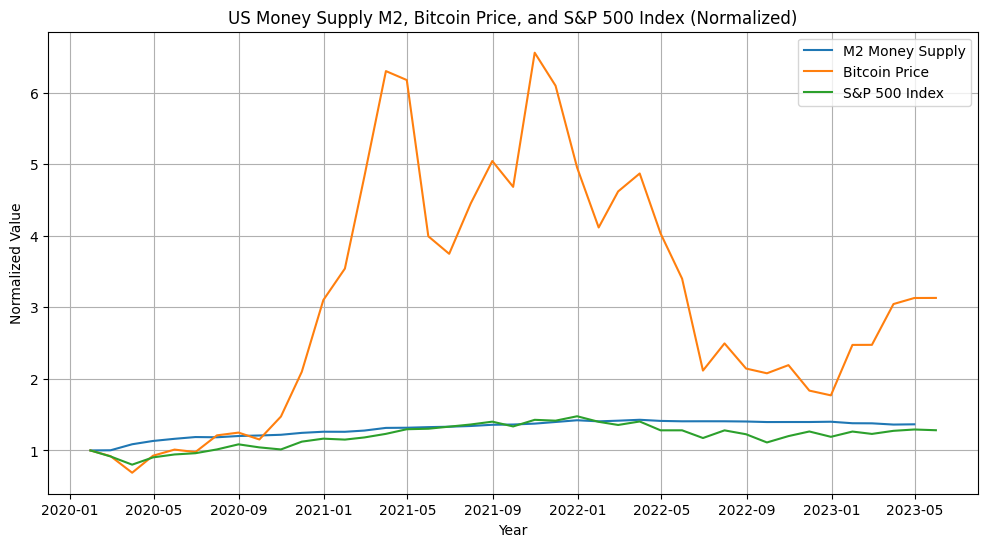

In [9]:

# Normalize the data
normalized_data = merged_data / merged_data.iloc[0]

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(normalized_data.index, normalized_data['M2'], label='M2 Money Supply')
plt.plot(normalized_data.index, normalized_data['BTC'], label='Bitcoin Price')
plt.plot(normalized_data.index, normalized_data['S&P 500'], label='S&P 500 Index')

plt.title('US Money Supply M2, Bitcoin Price, and S&P 500 Index (Normalized)')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()

plt.show()
